In [1]:
# uniform

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 50,
        x_rate = 0.5,
        m_rate = 0.5,
        weight_constraint = [-3.,3.],
        radioactive_rating = 0.1,
        grow_factor = 0.1,
        scale_hyperparameter = False,
        regularizer = None))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 4
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    

C:\Users\tcumi\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)


Checkpoint 100, Accuracy: 0.8271604938271605, Loss: 0.7481821554678457
Checkpoint 200, Accuracy: 0.8209876543209876, Loss: 0.7109344623706959
Checkpoint 300, Accuracy: 0.8271604938271605, Loss: 0.7027774386935763
Checkpoint 400, Accuracy: 0.8271604938271605, Loss: 0.6925194351761429
Checkpoint 500, Accuracy: 0.8333333333333334, Loss: 0.690689863982024


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.5754206 ]
 [0.21233203]
 [0.21224734]]
[1. 0. 0.] <-> [[0.8089743 ]
 [0.14647254]
 [0.04455316]]
[1. 0. 0.] <-> [[0.7197797 ]
 [0.1925698 ]
 [0.08765049]]
[0. 0. 1.] <-> [[0.9441447 ]
 [0.04492075]
 [0.01093459]]
[1. 0. 0.] <-> [[0.73809105]
 [0.15857641]
 [0.10333245]]
[1. 0. 0.] <-> [[0.58098847]
 [0.20973554]
 [0.20927599]]
[0. 1. 0.] <-> [[0.7339186 ]
 [0.16737439]
 [0.098707  ]]
[0. 1. 0.] <-> [[0.3402976 ]
 [0.32130897]
 [0.33839345]]
[1. 0. 0.] <-> [[0.94610083]
 [0.04338705]
 [0.01051201]]
[1. 0. 0.] <-> [[0.8823093 ]
 [0.09232758]
 [0.02536313]]
[1. 0. 0.] <-> [[0.5917113 ]
 [0.20474352]
 [0.20354524]]
[1. 0. 0.] <-> [[0.4373999 ]
 [0.27679417]
 [0.28580594]]
[0. 1. 0.] <-> [[0.71767765]
 [0.19794814]
 [0.08437426]]
[1. 0. 0.] <-> [[0.8598616 ]
 [0.1091121 ]
 [0.03102623]]
[1. 0. 0.] <-> [[0.8685972 ]
 [0.10260327]
 [0.02879952]]
[1. 0. 0.] <-> [[0.8456335 ]
 [0.11965425]
 [0.03471236]]
[1. 0. 0.] <-> [[0.72244   ]
 [0.20264737]
 [0.07491262]]
[0. 1. 0.] <->

In [12]:
# Testing Performance

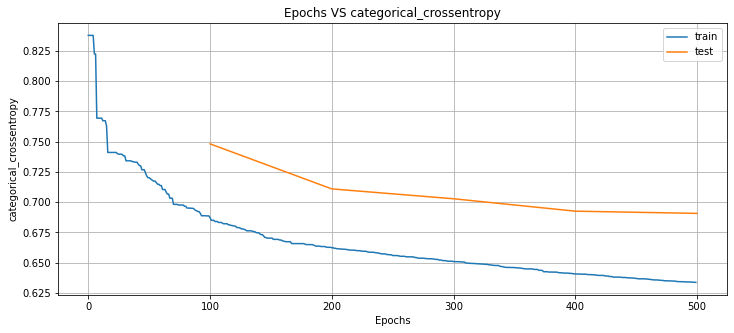

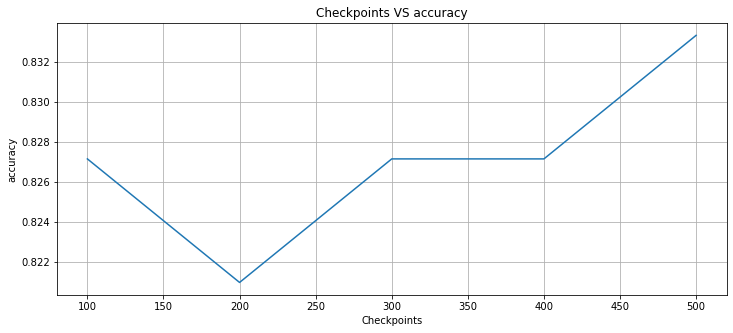

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8271604938271605, 'mean_square_error': 3.1397303152031744, 'categorical_crossentropy': 0.7481821554678457, 'precision': 0.7407407407407407, 'recall': 0.7407407407407407, 'f1': 0.7407407407407407, 'essential_metrics': {0: {'tp_hit': 75, 'fp_hit': 18, 'tn_hit': 12, 'fn_hit': 3}, 1: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 16}, 2: {'tp_hit': 5, 'fp_hit': 10, 'tn_hit': 84, 'fn_hit': 9}}, 'checkpoint': 100} 


{'accuracy': 0.8209876543209876, 'mean_square_error': 2.9383482119978592, 'categorical_crossentropy': 0.7109344623706959, 'precision': 0.7314814814814815, 'recall': 0.7314814814814815, 'f1': 0.7314814814814816, 'essential_metrics': {0: {'tp_hit': 75, 'fp_hit': 19, 'tn_hit': 11, 'fn_hit': 3}, 1: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 16}, 2: {'tp_hit': 4, 'fp_hit': 10, 'tn_hit': 84, 'fn_hit': 10}}, 'checkpoint': 200} 


{'accuracy': 0.8271604938271605, 'mean_square_error': 2.911397490793116, 'categorical_crossentropy': 0.7027774386935763, 'precision

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[[ 1.8686373 ]
 [-1.5487745 ]
 [-2.9528134 ]
 [-0.25566903]
 [ 2.2627082 ]]
 bias: [-1.8958738]

Neuron 1: weights:
[[-0.36856785]
 [-0.7641641 ]
 [-2.586802  ]
 [-1.778611  ]
 [-1.0152345 ]]
 bias: [0.8962272]

Neuron 2: weights:
[[ 2.5278676]
 [ 1.5004839]
 [-2.4882634]
 [-2.3559089]
 [-0.7794438]]
 bias: [1.7180109]

Neuron 3: weights:
[[ 0.215888  ]
 [ 1.071292  ]
 [ 2.5505028 ]
 [-0.35992295]
 [-3.        ]]
 bias: [0.7079316]

$
Layer 2
Neuron 0: weights:
[[ 2.807815 ]
 [-2.556109 ]
 [ 2.9669752]
 [-3.       ]]
 bias: [0.5823878]

Neuron 1: weights:
[[-1.5748687 ]
 [-1.0376965 ]
 [-0.45217267]
 [-0.4744541 ]]
 bias: [-0.0342607]

Neuron 2: weights:
[[-0.1214842 ]
 [-2.0061715 ]
 [-0.20162652]
 [ 2.4206755 ]]
 bias: [-2.4770343]

$

